# Robustness Analysis

This notebook is used to compute the robustness of the selected optimal policies.

In [1]:
import pandas as pd
from ema_workbench import load_results
import os
from dmdu.general.visualization import plot_robustness
from dmdu.policydiscovery.robustness import get_robustness_dataframe
from model.enumerations import ProblemFormulation

## Relevant Problem Formulations

In [2]:
problem_formulations = [
    ProblemFormulation.UTILITARIAN_AGGREGATED,
    ProblemFormulation.UTILITARIAN_DISAGGREGATED,
    ProblemFormulation.SUFFICIENTARIAN_AGGREGATED,
    ProblemFormulation.SUFFICIENTARIAN_DISAGGREGATED
]

## Loading Experimental Results
Loading the results from running all selected optimal policies with 400 scenarios.

In [3]:
problem_formulations_dict = {}

for problem_formulation in problem_formulations:
    target_directory = os.path.join(
        os.path.dirname(os.getcwd()),
        'data',
        'experimentsextensive',
        f'results_{problem_formulation.name}')
    experiments, outcomes = load_results(target_directory)
    outcomes = pd.DataFrame(outcomes)
    problem_formulations_dict[problem_formulation.name] = experiments, outcomes

## Relevant Outcome Names

In [4]:
names = [
    'Utility',
    'Total Output',
    'Damages',
    'Atmospheric Temperature',
    'Industrial Emission',
    'Temperature overshoot'
]
names = [name + ' 2105' for name in names]

## Compute Robustness

In [5]:
# Compute robustness for each outcome
robustness_dataframe = None
for problem_formulation, (experiments, outcomes) in problem_formulations_dict.items():

    outcomes = outcomes.loc[:, names]

    df = get_robustness_dataframe(experiments, outcomes, problem_formulation)
    if robustness_dataframe is None:
        robustness_dataframe = df
    else:
        robustness_dataframe = pd.concat([robustness_dataframe, df])


In [6]:
robustness_dataframe

,Policy,hurwicz(Utility),minimax(Total Output),90minimax(Damages),starr(Atmospheric Temperature),starr(Industrial Emission),starr(Temperature overshoot),Problem Formulation
0,0,10110.341523,19.385881,25.997767,0.9625,0.0,0.2575,UTILITARIAN_AGGREGATED
1,1,10107.181923,8.227009,15.356562,1.0000,1.0,0.6775,UTILITARIAN_AGGREGATED
2,2,10106.795026,3.699070,15.156808,1.0000,1.0,0.6750,UTILITARIAN_AGGREGATED
3,3,10107.181906,8.135832,15.352535,1.0000,1.0,0.6775,UTILITARIAN_AGGREGATED
4,4,10107.173435,8.850417,15.384109,1.0000,1.0,0.6775,UTILITARIAN_AGGREGATED
...,...,...,...,...,...,...,...,...
95,95,9937.190347,0.120912,11.887303,1.0000,1.0,0.6775,SUFFICIENTARIAN_DISAGGREGATED
96,96,9940.399514,1.092247,11.925872,1.0000,1.0,0.6775,SUFFICIENTARIAN_DISAGGREGATED
97,97,9938.661810,0.565126,11.904939,1.0000,1.0,0.6775,SUFFICIENTARIAN_DISAGGREGATED
98,98,9940.517626,1.128177,11.927299,1.0000,1.0,0.6775,SUFFICIENTARIAN_DISAGGREGATED


## Visualization of Robustness

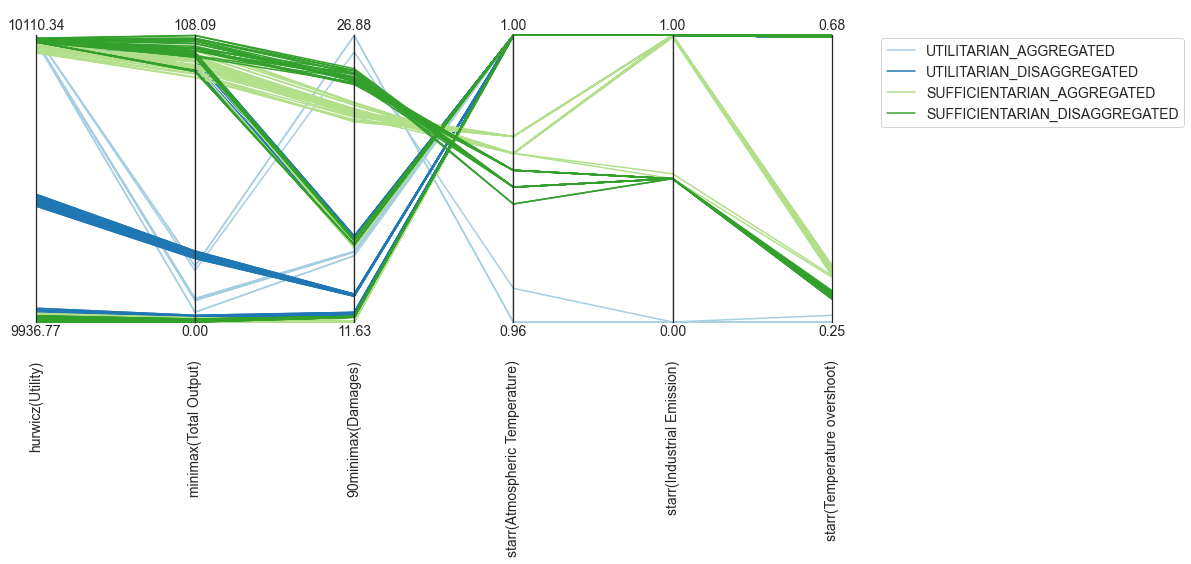

In [8]:
plot_robustness(robustness_dataframe, saving=True, file_name='robustness')